In [1]:
import numpy as np
from functools import partial
from tqdm import tqdm

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

from condn import matrix_given_condn
from descent import gradient_descent

In [2]:
gd_params_1 = {'eps': 5e-3,
               'alpha': 1e-3}

gd_1 = partial(gradient_descent, **gd_params_1, return_trajectory=True)

gd_params_2 = {'eps': 5e-3,
               'compute_alpha': True,
               'method': 'golden'}

gd_2 = partial(gradient_descent, **gd_params_2, return_trajectory=True)

In [3]:
def solve_random_sqpr(gd, condn, n, random_state=777):
    np.random.seed([random_state] * 2)
    A = matrix_given_condn(condn, n, random_state)
    b = np.random.rand(n)
    
    f = lambda X: X.dot(A).dot(X) - b.dot(X)
    f_grad = lambda X: (A + A.T).dot(X) - b
    
    x0 = np.random.rand(n)
    
    return len(gd(f, f_grad, x0)) - 1

In [18]:
condn = np.arange(2, 500, 25)
n = np.array([10, 15, 20, 30, 50, 75, 100])

### Constant alpha

In [19]:
res_1 = [[solve_random_sqpr(gd_1, c, n_) for n_ in n] for c in tqdm(condn, total=len(condn))]

100%|██████████| 20/20 [00:01<00:00, 13.23it/s]


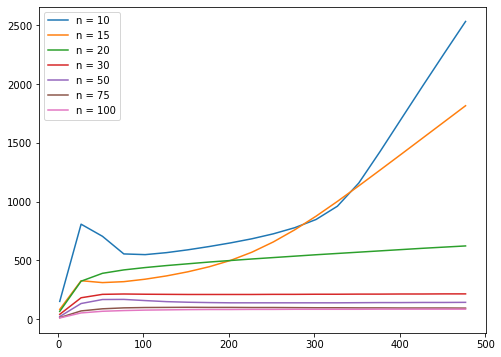

In [20]:
plt.figure(figsize=(8, 6))
lines = plt.plot(condn, np.array(res_1))
plt.legend(handles=lines, labels=list(map(lambda x: 'n = ' + x, n.astype(str))))

### Choose alpha

In [21]:
res_2 = [[solve_random_sqpr(gd_2, c, n_) for n_ in n] for c in tqdm(condn, total=len(condn))]

100%|██████████| 20/20 [00:03<00:00,  6.51it/s]


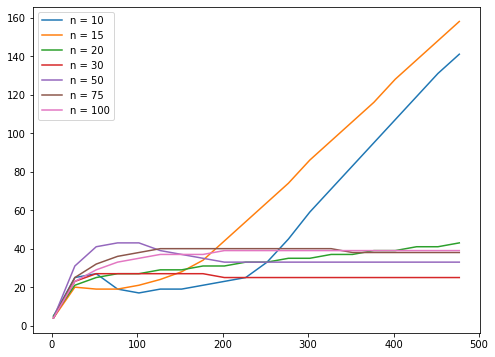

In [23]:
plt.figure(figsize=(8, 6))
lines = plt.plot(condn, np.array(res_2))
plt.legend(handles=lines, labels=list(map(lambda x: 'n = ' + x, n.astype(str))));